In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Directorios de las imágenes de entrenamiento y prueba
train_dir = os.path.join(os.getcwd(), 'Dataset/train')
test_dir = os.path.join(os.getcwd(), 'Dataset/test')

# Preprocesamiento de las imágenes
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Carga y preparación de los datos de entrenamiento y prueba
train_data = train_datagen.flow_from_directory(train_dir, target_size=(100, 100), batch_size=32, class_mode='binary')
test_data = test_datagen.flow_from_directory(test_dir, target_size=(100, 100), batch_size=32, class_mode='binary')


Found 1633 images belonging to 7 classes.
Found 810 images belonging to 8 classes.


In [3]:
# Creación del modelo de red neuronal convolucional
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilación y entrenamiento del modelo
#binary_crossentropy   mean_squared_error    sparce_categorical_crossentropy
#sgd     adam    rmsprop     comparison    apply_gradients    schedules
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
historia=model.fit(train_data, epochs=60, validation_data=test_data)




Epoch 1/60
52/52 [==============================] - 19s 357ms/step - loss: 5.6285 - accuracy: 0.1304 - val_loss: 10.5370 - val_accuracy: 0.0593
Epoch 2/60
52/52 [==============================] - 20s 375ms/step - loss: 5.5940 - accuracy: 0.1304 - val_loss: 10.5370 - val_accuracy: 0.0593
Epoch 3/60
52/52 [==============================] - 19s 373ms/step - loss: 5.5940 - accuracy: 0.1304 - val_loss: 10.5370 - val_accuracy: 0.0593
Epoch 4/60
52/52 [==============================] - 19s 363ms/step - loss: 5.5940 - accuracy: 0.1304 - val_loss: 10.5370 - val_accuracy: 0.0593
Epoch 5/60
52/52 [==============================] - 19s 367ms/step - loss: 5.5940 - accuracy: 0.1304 - val_loss: 10.5370 - val_accuracy: 0.0593
Epoch 6/60
52/52 [==============================] - 19s 373ms/step - loss: 5.5940 - accuracy: 0.1304 - val_loss: 10.5370 - val_accuracy: 0.0593
Epoch 7/60
52/52 [==============================] - 19s 369ms/step - loss: 5.5940 - accuracy: 0.1304 - val_loss: 10.5370 - val_accuracy:

52/52 [==============================] - 19s 375ms/step - loss: 5.5940 - accuracy: 0.1304 - val_loss: 10.5370 - val_accuracy: 0.0593
Epoch 58/60
52/52 [==============================] - 19s 371ms/step - loss: 5.5940 - accuracy: 0.1304 - val_loss: 10.5370 - val_accuracy: 0.0593
Epoch 59/60
52/52 [==============================] - 20s 377ms/step - loss: 5.5940 - accuracy: 0.1304 - val_loss: 10.5370 - val_accuracy: 0.0593
Epoch 60/60
52/52 [==============================] - 20s 385ms/step - loss: 5.5940 - accuracy: 0.1304 - val_loss: 10.5370 - val_accuracy: 0.0593


In [5]:
# Matriz de confusión para el entrenamiento
train_images = []
train_labels = []
for images, labels in train_data:
    train_images.append(images)
    train_labels.append(labels)
    if len(train_images) == len(train_data):
        break
train_images = np.concatenate(train_images)
train_labels = np.concatenate(train_labels)
train_predictions = model.predict(train_images)
train_predicted_labels = np.where(train_predictions > 0.5, 1, 0)
train_confusion = confusion_matrix(train_labels, train_predicted_labels)
print(f"Matriz de confusión para el entrenamiento:\n{train_confusion}")

# Matriz de confusión para la evaluación
test_images = []
test_labels = []
for images, labels in test_data:
    test_images.append(images)
    test_labels.append(labels)
    if len(test_images) == len(test_data):
        break
test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)
test_predictions = model.predict(test_images)
test_predicted_labels = np.where(test_predictions > 0.5, 1, 0)
test_confusion = confusion_matrix(test_labels, test_predicted_labels)
print(f"Matriz de confusión para la evaluación:\n{test_confusion}")
print('Precisión en la prueba:', historia.history['val_accuracy'][-1])


52/52 [==============================] - 4s 67ms/step
Matriz de confusión para el entrenamiento:
[[  0  62   0   0   0   0   0]
 [  0 213   0   0   0   0   0]
 [  0 105   0   0   0   0   0]
 [  0 949   0   0   0   0   0]
 [  0  37   0   0   0   0   0]
 [  0 204   0   0   0   0   0]
 [  0  63   0   0   0   0   0]]
26/26 [==============================] - 2s 80ms/step
Matriz de confusión para la evaluación:
[[  0   1   0   0   0   0   0   0]
 [  0  48   0   0   0   0   0   0]
 [  0  97   0   0   0   0   0   0]
 [  0  45   0   0   0   0   0   0]
 [  0 459   0   0   0   0   0   0]
 [  0  19   0   0   0   0   0   0]
 [  0 114   0   0   0   0   0   0]
 [  0  27   0   0   0   0   0   0]]
Precisión en la prueba: 0.05925925821065903


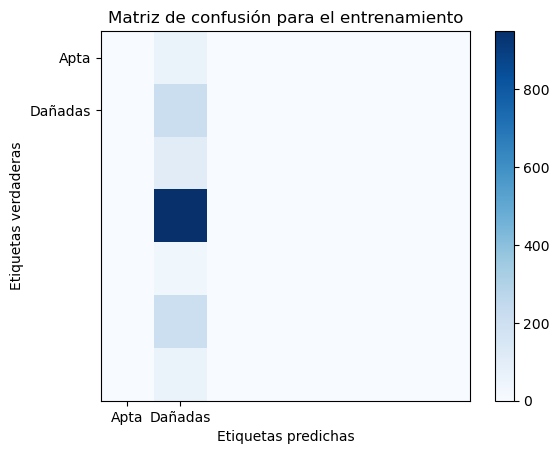

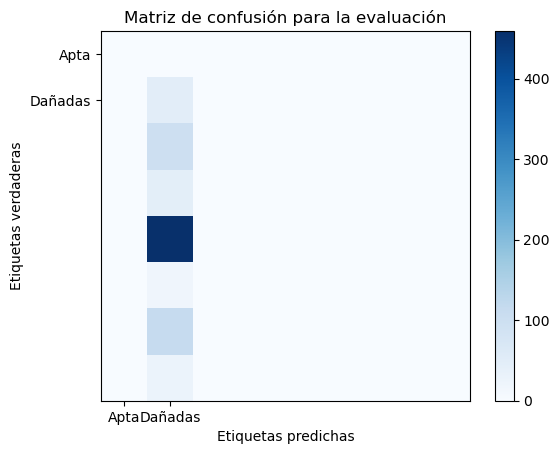

In [6]:
# Plot de la matriz de confusión para el entrenamiento
plt.imshow(train_confusion, cmap=plt.cm.Blues)
plt.xlabel('Etiquetas predichas')
plt.ylabel('Etiquetas verdaderas')
plt.xticks([0, 1], ['Apta', 'Dañadas'])
plt.yticks([0, 1], ['Apta', 'Dañadas'])
plt.colorbar()
plt.title('Matriz de confusión para el entrenamiento')
plt.show()

# Plot de la matriz de confusión para la evaluación
plt.imshow(test_confusion, cmap=plt.cm.Blues)
plt.xlabel('Etiquetas predichas')
plt.ylabel('Etiquetas verdaderas')
plt.xticks([0, 1], ['Apta', 'Dañadas'])
plt.yticks([0, 1], ['Apta', 'Dañadas'])
plt.colorbar()
plt.title('Matriz de confusión para la evaluación')
plt.show()